# <font style="color:rgb(50,120,229)"> Métricas de Evaluación con Keras </font>

En el cuaderno anterior, aprendiste cómo implementar métricas de evaluación para clasificación desde cero.

Bibliotecas como Scikit-Learn ya proporcionan tales funcionalidades. De hecho, también podemos usar todas esas métricas de Keras.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd


matplotlib.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 7)

## <font style="color:rgb(50,120,229)"> 1. Cargar los datos </font>

Vamos a cargar un conjunto de datos aleatorio  para clasificación binaria.

In [2]:
data = pd.read_csv('./data/metrics_data.csv')

data.head()

,X1,X2,y
0,4.584446,23.067917,1
1,5.128208,19.373913,0
2,5.161425,25.418507,1
3,3.748333,23.140297,1
4,4.116462,21.080015,0


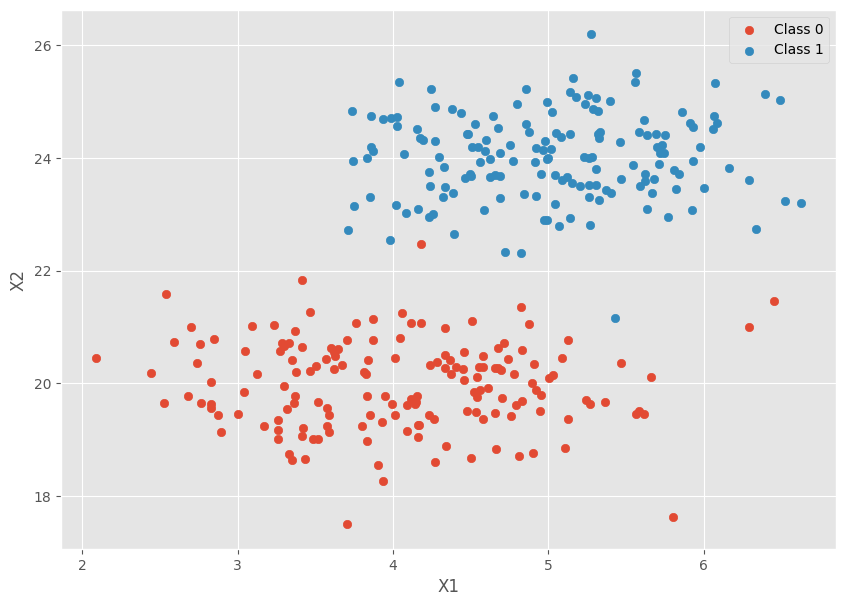

In [3]:
X_train = data[['X1', 'X2']].values
y_train = data['y'].values

plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

## <font style="color:rgb(50,120,229)"> 2. Definir el modelo </font>

Vamos a crear un modelo simple con una capa lineal y una función de activación sigmoide.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(2,)))
#model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### <font style="color:rgb(50,120,229)"> 2.1. Compilar el modelo </font>

Al compilar el modelo, podemos especificar las métricas que queremos usar.

Keras proporciona una lista de métricas que se pueden usar. Puedes encontrar más información sobre las métricas de clasificación en la [documentación oficial de Keras](https://keras.io/api/metrics/classification_metrics/).

In [5]:
# Metricas de clasificación
from keras.metrics import  Precision, Recall, BinaryAccuracy

THRESHOLD = 0.6

precision_metric = Precision(thresholds=THRESHOLD)
recall_metric = Recall(thresholds=THRESHOLD)
accuracy_metric = BinaryAccuracy(threshold=THRESHOLD)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[precision_metric, recall_metric, BinaryAccuracy])

**Todas las métricas de clasificación estan usando los valores por defecto de `threshold=0.5`.**

La idea de estas métricas es modificar el umbral de clasificación para ver cómo se comporta el modelo.

## <font style="color:rgb(50,120,229)"> 3. Entrenar el modelo </font>

In [6]:

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - binary_accuracy: 0.4964 - loss: 2.4720 - precision: 0.4964 - recall: 1.0000
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - binary_accuracy: 0.5068 - loss: 1.2199 - precision: 0.5068 - recall: 1.0000 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - binary_accuracy: 0.4982 - loss: 0.7147 - precision: 0.5265 - recall: 0.3168 
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5137 - loss: 0.7398 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - binary_accuracy: 0.6065 - loss: 0.6852 - precision: 0.5111 - recall: 0.1533 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5008 - loss: 0.6945 - precision: 0.6090 - recall: 0.6134 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5636 - loss: 0.6820 - precision: 0.4989 - recall: 0.0861 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6011 - loss: 0

## <font style="color:rgb(50,120,229)"> 4. Matriz de Confusión </font>

In [7]:
from sklearn.metrics import confusion_matrix

THRESHOLD = 0.7

y_pred = model.predict(X_train)
y_pred = (y_pred > THRESHOLD).astype(int)

confusion_matrix(y_train, y_pred, normalize='all')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[0.50625, 0.     ],
       [0.49375, 0.     ]])

<Axes: >

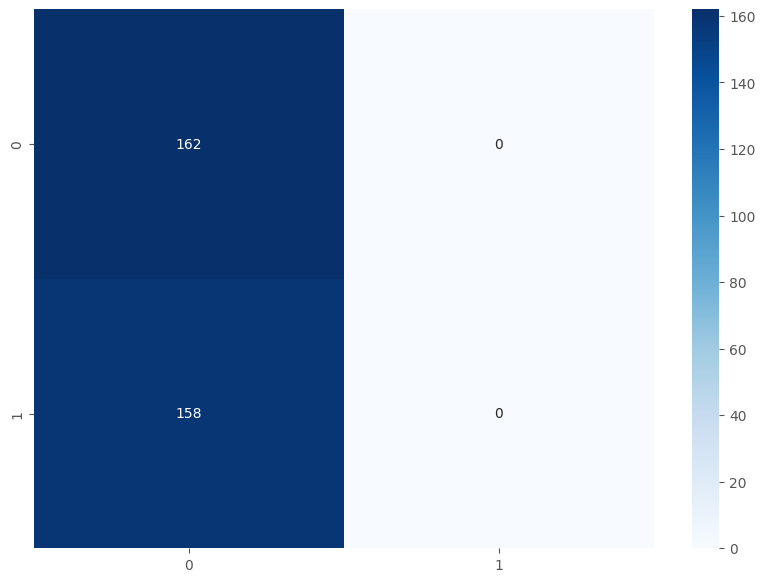

In [8]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d', cmap='Blues')

## <font style="color:rgb(50,120,229)"> 5. Curva ROC </font>

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 290ms/step
0.5030864197530864


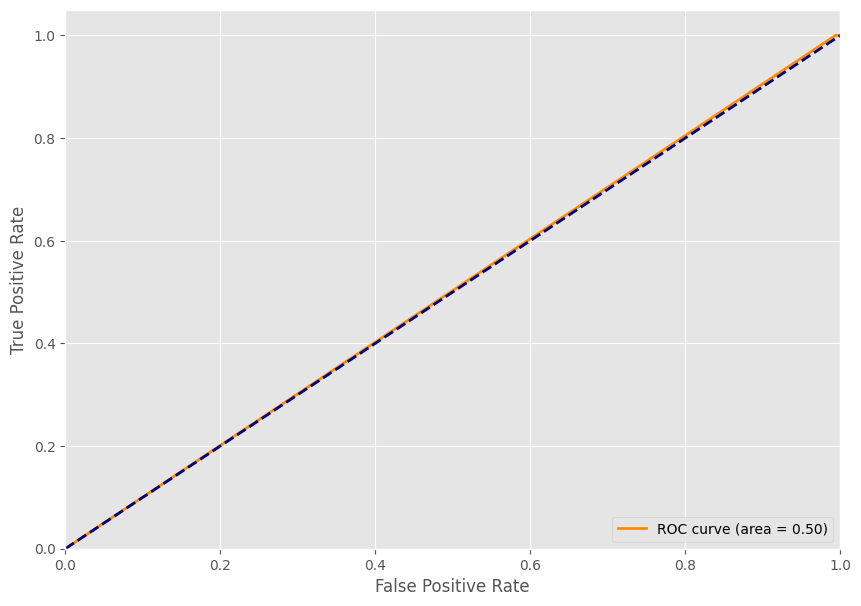

In [9]:
from sklearn.metrics import roc_curve, auc

THRESHOLD = 0.4

y_pred = model.predict(X_train)
y_pred = (y_pred > THRESHOLD).astype(int)

fpr, tpr, _ = roc_curve(y_train, y_pred)

roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.show()